**Data Analysis seminar (task 1 - 4 summary) by Justinas Lekavičius.**


Data set 'Vehicle dataset' taken from https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv


In [1]:
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import pandas
import numpy
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

pandas.options.mode.chained_assignment = None
data_set = pandas.read_csv("Car details v3.csv", sep = ',')

**General overview of the dataset. Sample rows:**

In [2]:
data_set.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
print("Number of objects:", len(data_set))

Number of objects: 8128


**Variable descriptions and data types:**
__________________________________________________________________
- name (nominal): the name of the vehicle. 
- year (interval): the manufacture year of the vehicle.
- selling_price (interval): the price the vehicle is sold for.
- km_driven (interval): the total kilometers driven by the vehicle (mileage).
- fuel (nominal): the fuel type of the vehicle.
- seller_type (nominal): the seller entity (individual, business, etc.).
- transmission (nominal): the type of transmission of the vehicle.
- owner (ordinal): the type of owner (first, second owner, etc.).
- mileage (ratio): the amount of kilometers the vehicle can drive in one liter of fuel.
- engine (interval): the engine cubic capacity (CC).
- max_power (ratio): the vehicle power measurement in brake horse power (bhp).
- torque (ratio): the torque, measured in Newton meters of torque at specified RPM (revolutions per minute).
- seats (interval): the number of seats for a vehicle.

**Are there missing values?**

In [4]:
data_set.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

**mileage, engine, max_power, torque, seats have missing values. Possible reasons:**
1. Data for vehicles posted on cardekho.com (data set source) is simply unspecified.
2. Some of the data is unavailable because the vehicles are discontinued or not for sale.
____________________________________________________________
Suggested action: simply remove the rows with missing values.
That leaves us with 7889 objects (was 8128) 

In [5]:
data_set_cleaned = data_set.dropna() # removing rows with empty values
data_set_cleaned["engine"] = data_set_cleaned["engine"].str.replace(" CC","").astype(int)
data_set_cleaned["mileage"] = data_set_cleaned["mileage"].str.replace(" kmpl","").str.replace(" km/kg","").astype(float)
data_set_cleaned["max_power"] = data_set_cleaned["max_power"].str.replace(" bhp","").astype(float)
data_set_cleaned = data_set_cleaned[data_set_cleaned['year'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['selling_price'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['km_driven'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['mileage'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['engine'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['max_power'] != 0]

**Are there any outliers? Let's check using box plot.**


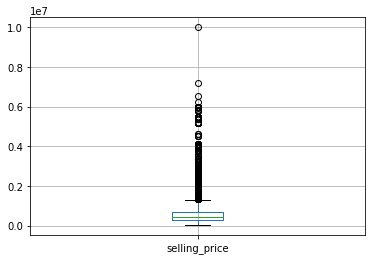

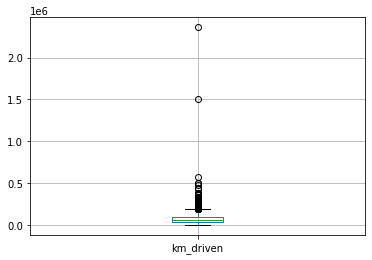

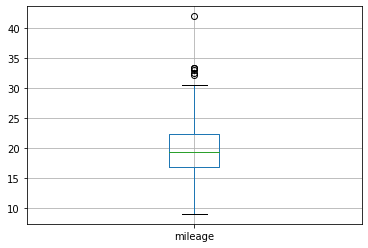

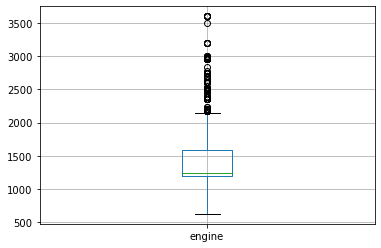

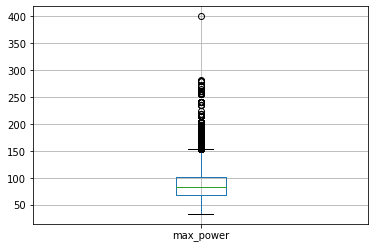

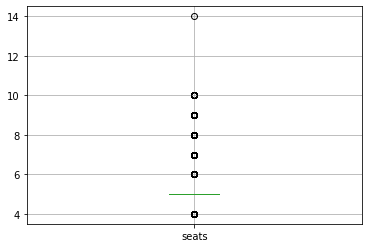

In [6]:
pandas.DataFrame(data = data_set_cleaned, columns = ['selling_price']).boxplot()
matplotlib.pyplot.show()
pandas.DataFrame(data = data_set_cleaned, columns = ['km_driven']).boxplot()
matplotlib.pyplot.show()
pandas.DataFrame(data = data_set_cleaned, columns = ['mileage']).boxplot()
matplotlib.pyplot.show()
pandas.DataFrame(data = data_set_cleaned, columns = ['engine']).boxplot()
matplotlib.pyplot.show()
pandas.DataFrame(data = data_set_cleaned, columns = ['max_power']).boxplot()
matplotlib.pyplot.show()
pandas.DataFrame(data = data_set_cleaned, columns = ['seats']).boxplot()
matplotlib.pyplot.show()

**Possible reasons:**
1. Simply expensive vehicle (selling_price) or very used vehicle (very high km_driven).
2. Mistakes in data (very unlikely that vehicle has very large km_driven).
____________________________________________________________
Suggested action: also remove the rows with missing or suspicious values (remove outliers).

**Removing outliers.**


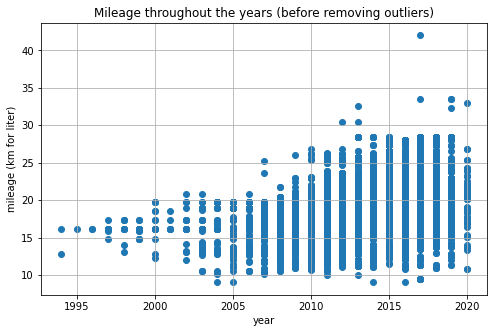

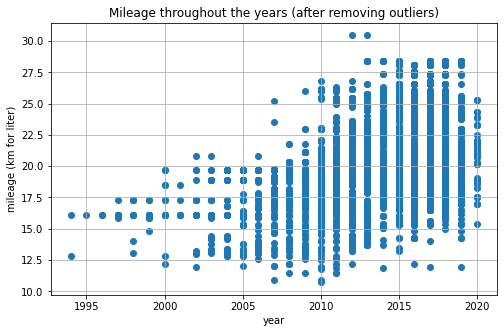

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0
6220,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
6221,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0
6222,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0


In [7]:
#Getting outliers using Interquartile range (IQR)
                                                  
def outliers(data_set, variables):

    Q1 = data_set[variables].quantile(0.25) #one quarter
    Q3 = data_set[variables].quantile(0.75) #three quarters
    IQR = Q3 - Q1
    return ((data_set[variables] < (Q1 - 1.5 * IQR) ) | (data_set[variables] > (Q3 + 1.5 * IQR))).any(axis=1)

data_outliers = outliers(data_set_cleaned, ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power'])

#with outliers:
plt.figure(figsize=(8, 5))
plt.scatter(data_set_cleaned['year'], data_set_cleaned['mileage'])
plt.title('Mileage throughout the years (before removing outliers)')
plt.xlabel('year')
plt.ylabel('mileage (km for liter)')
plt.grid()
plt.show()


data_set_cleaned = data_set_cleaned[~data_outliers]
data_set_cleaned = data_set_cleaned.reset_index(drop=True)
#without outliers:
plt.figure(figsize=(8, 5))
plt.scatter(data_set_cleaned['year'], data_set_cleaned['mileage'])
plt.title('Mileage throughout the years (after removing outliers)')
plt.xlabel('year')
plt.ylabel('mileage (km for liter)')
plt.grid()
plt.show()
data_set_cleaned


**Correlations**

In [8]:
pandas.DataFrame.corr(data_set_cleaned)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.705901,-0.493976,0.412335,0.051825,0.228828,0.146691
selling_price,0.705901,1.000000,-0.347917,0.244073,0.413622,0.583675,0.191435
km_driven,-0.493976,-0.347917,1.000000,-0.073927,0.217061,0.021892,0.035232
mileage,0.412335,0.244073,-0.073927,1.000000,-0.196208,-0.157908,-0.117905
engine,0.051825,0.413622,0.217061,-0.196208,1.000000,0.821530,0.201079
max_power,0.228828,0.583675,0.021892,-0.157908,0.821530,1.000000,0.140371
seats,0.146691,0.191435,0.035232,-0.117905,0.201079,0.140371,1.000000


**Covariances**

In [9]:
pandas.DataFrame.cov(data_set_cleaned)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,15.191997,6.715368e+05,-7.258906e+04,5.364247,4.909001e+01,1.787588e+01,0.340398
selling_price,671536.754435,5.957130e+10,-3.201495e+09,198833.296854,2.453423e+07,2.855228e+06,27817.400436
km_driven,-72589.059621,-3.201495e+09,1.421401e+09,-9302.746330,1.988795e+06,1.654244e+04,790.817102
mileage,5.364247,1.988333e+05,-9.302746e+03,11.140446,-1.591545e+02,-1.056345e+01,-0.234293
engine,49.090011,2.453423e+07,1.988795e+06,-159.154508,5.906100e+04,4.001519e+03,29.093394
max_power,17.875876,2.855228e+06,1.654244e+04,-10.563453,4.001519e+03,4.017003e+02,1.674961
seats,0.340398,2.781740e+04,7.908171e+02,-0.234293,2.909339e+01,1.674961e+00,0.354449


**Conclusions so far:**
1. Some cleaning may be needed (to remove missing values or weird data).
2. Positive correlation in selling price and max power/year of vehicles.
3. Negative covariance in mileage and engine (more powerful engine has more fuel consumption)
4. No redundant variables, but some have to be formatted (string to number)
5. Torque variable can be condensed into torque and speed (N.m and RPM).

**Writing own version of simple linear regression**

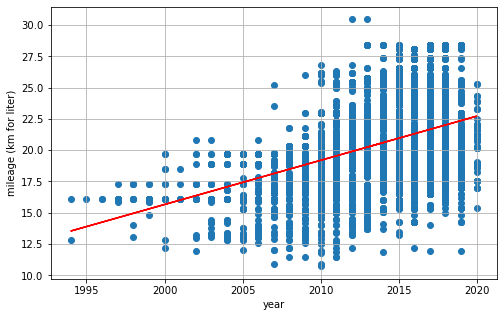

In [10]:
def closed_form_solution(x, y): # Based on lecture 3 slides
    cov_x_y = 0
    var_x = 0

    for k in range(len(x)):
      cov_x_y += (x[k] - numpy.mean(x)) * (y[k] - numpy.mean(y))
      var_x += numpy.power((x[k] - numpy.mean(x)), 2)
      
    slope = cov_x_y / var_x #w1 = cov(x,y) / var(x)
    intercept = numpy.mean(y) - (slope * numpy.mean(x)) #w0 = ¯y − w1x¯

    return intercept, slope

x_axis = data_set_cleaned['year'].values.reshape(-1, 1) 
y_axis = data_set_cleaned['mileage'].values.reshape(-1, 1) 

intercept, slope = closed_form_solution(x_axis, y_axis)
y_prediction = x_axis * slope + intercept # yˆi = w0 + w1xi

plt.figure(figsize=(8, 5))
plt.plot(x_axis, y_prediction, color="red")
plt.scatter(x_axis, y_axis)
plt.xlabel('year')
plt.ylabel('mileage (km for liter)')
plt.grid()
plt.show()

**Using scikit-learn version of linear regression**

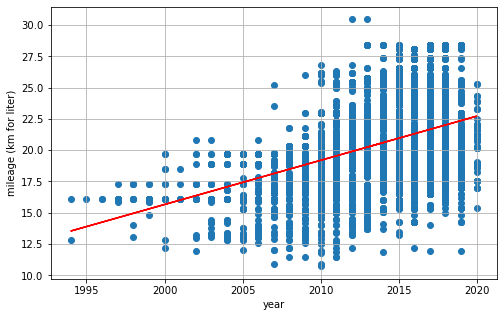

scikit:
[-690.5322222] [[0.35309687]]
mine:
[-690.5322222] [0.35309687]


In [11]:
lr = LinearRegression()
lr.fit(x_axis, y_axis)
y_pred = lr.predict(x_axis)


plt.figure(figsize=(8, 5))
plt.plot(x_axis, y_pred, color="red")
plt.scatter(x_axis, y_axis)
plt.xlabel('year')
plt.ylabel('mileage (km for liter)')
plt.grid()
plt.show()

print("scikit:")
print(lr.intercept_, lr.coef_)
print("mine:")
print(intercept, slope)

**Feature engineering. One hot encoding**

In [12]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoder_data = pandas.DataFrame(one_hot_encoder.fit_transform(data_set_cleaned[['owner']]).toarray())
encoded = data_set_cleaned[['km_driven']].join(encoder_data)
encoded.columns = numpy.insert(one_hot_encoder.get_feature_names_out(), 0, "km_driven")

print(encoded)
print()

print("before using polynomial features")
print()
print('mean squared error: ', mean_squared_error(y_axis, lr.predict(x_axis)))
print('mean absolute error: ', mean_absolute_error(y_axis, lr.predict(x_axis)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_axis, lr.predict(x_axis))))
print('coefficient of determination: ', r2_score(y_axis, lr.predict(x_axis)))

poly_features= PolynomialFeatures(degree=5, include_bias=False)
x_poly = poly_features.fit_transform(x_axis)
print()

model_poly = LinearRegression()
model_poly.fit(x_poly, y_axis)
print("after using polynomial features")
print()
print('mean squared error: ', mean_squared_error(y_axis, model_poly.predict(x_poly)))
print('mean absolute error: ', mean_absolute_error(y_axis, model_poly.predict(x_poly)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_axis, model_poly.predict(x_poly))))
print('coefficient of determination: ', r2_score(y_axis, model_poly.predict(x_poly)))

      km_driven  owner_First Owner  owner_Fourth & Above Owner  \
0        145500                1.0                         0.0   
1        120000                0.0                         0.0   
2        140000                0.0                         0.0   
3        127000                1.0                         0.0   
4        120000                1.0                         0.0   
...         ...                ...                         ...   
6219     110000                1.0                         0.0   
6220     119000                0.0                         1.0   
6221     120000                1.0                         0.0   
6222      25000                1.0                         0.0   
6223      25000                1.0                         0.0   

      owner_Second Owner  owner_Third Owner  
0                    0.0                0.0  
1                    1.0                0.0  
2                    0.0                1.0  
3                    0.

**Errors decreased when applied polynomial features.**

In [13]:
print("__________________________________________________________________________________________________________________")
print("80% training data, 20% test data")
x_training_80_20, x_testing_80_20, y_training_80_20, y_testing_80_20 = train_test_split(x_axis, y_axis, test_size=0.2, random_state=47)
model_80_20 = LinearRegression()
model_80_20.fit(x_training_80_20, y_training_80_20)
print('Training errors:')
print()
print('mean squared error: ', mean_squared_error(y_training_80_20, model_80_20.predict(x_training_80_20)))
print('mean absolute error: ', mean_absolute_error(y_training_80_20, model_80_20.predict(x_training_80_20)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_training_80_20, model_80_20.predict(x_training_80_20))))
print('coefficient of determination: ', r2_score(y_training_80_20, model_80_20.predict(x_training_80_20)))
print()
print('Testing errors:')
print()
print('mean squared error: ', mean_squared_error(y_testing_80_20, model_80_20.predict(x_testing_80_20)))
print('mean absolute error: ', mean_absolute_error(y_testing_80_20, model_80_20.predict(x_testing_80_20)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_testing_80_20, model_80_20.predict(x_testing_80_20))))
print('coefficient of determination: ', r2_score(y_testing_80_20, model_80_20.predict(x_testing_80_20)))

__________________________________________________________________________________________________________________
80% training data, 20% test data
Training errors:

mean squared error:  9.296892584675891
mean absolute error:  2.452641175616364
root mean squared error:  3.0490806130169616
coefficient of determination:  0.17169147653780348

Testing errors:

mean squared error:  9.041264442884215
mean absolute error:  2.453632926999781
root mean squared error:  3.0068695420460485
coefficient of determination:  0.16110054089943338


In [14]:
print("__________________________________________________________________________________________________________________")
print("75% training data, 25% test data")
x_training_75_25, x_testing_75_25, y_training_75_25, y_testing_75_25 = train_test_split(x_axis, y_axis, test_size=0.25, random_state=41)
model_75_25 = LinearRegression()
model_75_25.fit(x_training_75_25, y_training_75_25)
print('Training errors:')
print()
print('mean squared error: ', mean_squared_error(y_training_75_25, model_75_25.predict(x_training_75_25)))
print('mean absolute error: ', mean_absolute_error(y_training_75_25, model_75_25.predict(x_training_75_25)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_training_75_25, model_75_25.predict(x_training_75_25))))
print('coefficient of determination: ', r2_score(y_training_75_25, model_75_25.predict(x_training_75_25)))
print()
print('Testing errors:')
print()
print('mean squared error: ', mean_squared_error(y_testing_75_25, model_75_25.predict(x_testing_75_25)))
print('mean absolute error: ', mean_absolute_error(y_testing_75_25, model_75_25.predict(x_testing_75_25)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_testing_75_25, model_75_25.predict(x_testing_75_25))))
print('coefficient of determination: ', r2_score(y_testing_75_25, model_75_25.predict(x_testing_75_25)))
print("__________________________________________________________________________________________________________________")

__________________________________________________________________________________________________________________
75% training data, 25% test data
Training errors:

mean squared error:  9.461463224317557
mean absolute error:  2.4787312651172715
root mean squared error:  3.0759491582790437
coefficient of determination:  0.16973475757473966

Testing errors:

mean squared error:  8.59553554161023
mean absolute error:  2.3742981409545383
root mean squared error:  2.931814377072708
coefficient of determination:  0.17079962458334697
__________________________________________________________________________________________________________________


In [15]:
 print("__________________________________________________________________________________________________________________")
print("70% training data, 30% test data")
x_training_70_30, x_testing_70_30, y_training_70_30, y_testing_70_30 = train_test_split(x_axis, y_axis, test_size=0.3, random_state=56)
model_70_30 = LinearRegression()
model_70_30.fit(x_training_70_30, y_training_70_30)
print('Training errors:')
print()
print('mean squared error: ', mean_squared_error(y_training_70_30, model_70_30.predict(x_training_70_30)))
print('mean absolute error: ', mean_absolute_error(y_training_70_30, model_70_30.predict(x_training_70_30)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_training_70_30, model_70_30.predict(x_training_70_30))))
print('coefficient of determination: ', r2_score(y_training_70_30, model_70_30.predict(x_training_70_30)))
print()
print('Testing errors:')
print()
print('mean squared error: ', mean_squared_error(y_testing_70_30, model_70_30.predict(x_testing_70_30)))
print('mean absolute error: ', mean_absolute_error(y_testing_70_30, model_70_30.predict(x_testing_70_30)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_testing_70_30, model_70_30.predict(x_testing_70_30))))
print('coefficient of determination: ', r2_score(y_testing_70_30, model_70_30.predict(x_testing_70_30)))

__________________________________________________________________________________________________________________
70% training data, 30% test data
Training errors:

mean squared error:  9.202315611008306
mean absolute error:  2.4504835632684148
root mean squared error:  3.0335318707751044
coefficient of determination:  0.17283385775168425

Testing errors:

mean squared error:  9.344513506066734
mean absolute error:  2.4561642519108173
root mean squared error:  3.0568797009478037
coefficient of determination:  0.16333220595351705


**Performance comparison using k-fold cross validation**

average cross-validation score 1 (80% training, 20% testing):  3.049601722064937
average cross-validation score 2 (75% training, 25% testing):  3.0758693658612897
average cross-validation score 3 (70% training, 30% testing):  3.0355183350870045


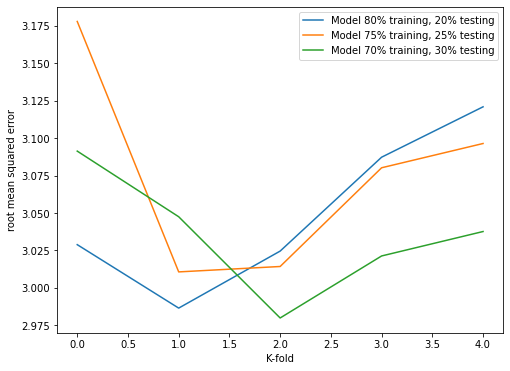

In [16]:

def root_mean_squared_error(model, x, y): # evaluation metric RMSE
    return numpy.sqrt(mean_squared_error(y, model.predict(x)))

validation_1 = cross_val_score(model_80_20, x_training_80_20, y_training_80_20, cv=5, scoring=root_mean_squared_error)
validation_2 = cross_val_score(model_75_25, x_training_75_25, y_training_75_25, cv=5, scoring=root_mean_squared_error)
validation_3 = cross_val_score(model_70_30, x_training_70_30, y_training_70_30, cv=5, scoring=root_mean_squared_error)

plt.figure(figsize=(8, 6))
plt.plot(validation_1, label='Model 80% training, 20% testing')
plt.plot(validation_2, label='Model 75% training, 25% testing')
plt.plot(validation_3, label='Model 70% training, 30% testing')

plt.xlabel('K-fold')
plt.ylabel('root mean squared error')
plt.legend()
print("average cross-validation score 1 (80% training, 20% testing): ", validation_1.mean())
print("average cross-validation score 2 (75% training, 25% testing): ", validation_2.mean())
print("average cross-validation score 3 (70% training, 30% testing): ", validation_3.mean())

**Regularization applied L2 Ridge regression**

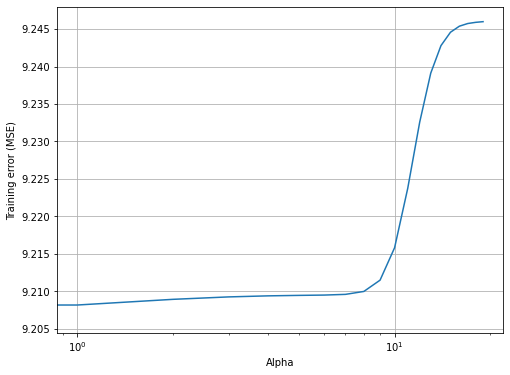

Errors before regularization:

mean squared error:  8.934663463027238
mean absolute error:  2.403015544007329
root mean squared error:  2.9890907418523174
coefficient of determination:  0.19786884010107797

Errors after regularization:

mean squared error:  9.241521941801096
mean absolute error:  2.4520909909523914
root mean squared error:  3.0399871614533334
coefficient of determination:  0.17031987325725062


In [17]:
#polynomial 4 degree

poly = PolynomialFeatures(degree=4)
x_axis_poly = poly.fit_transform(x_axis)
# feature standartization
scaler = StandardScaler()
x_axis_poly = scaler.fit_transform(x_axis_poly)

alphas = numpy.geomspace(1e-5, 1e2, 20)
train_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_axis_poly, y_axis)
    
    # mean squared error
    train_error = mean_squared_error(y_axis, ridge_model.predict(x_axis_poly))
    train_errors.append(train_error)
    
plt.figure(figsize=(8, 6))
plt.plot(train_errors, label='Training error (MSE)')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Alpha')
plt.ylabel('Training error (MSE)')
plt.xscale('log')
plt.grid()
plt.show()

print('Errors before regularization:')
print()
model_poly = LinearRegression()
model_poly.fit(x_axis_poly, y_axis)
print('mean squared error: ', mean_squared_error(y_axis, model_poly.predict(x_axis_poly)))
print('mean absolute error: ', mean_absolute_error(y_axis, model_poly.predict(x_axis_poly)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_axis, model_poly.predict(x_axis_poly))))
print('coefficient of determination: ', r2_score(y_axis, model_poly.predict(x_axis_poly)))
print()
print('Errors after regularization:')
print()
model_ridge = Ridge(alpha=1e0)
model_ridge.fit(x_axis_poly, y_axis)
print('mean squared error: ', mean_squared_error(y_axis, model_ridge.predict(x_axis_poly)))
print('mean absolute error: ', mean_absolute_error(y_axis, model_ridge.predict(x_axis_poly)))
print('root mean squared error: ', numpy.sqrt(mean_squared_error(y_axis, model_ridge.predict(x_axis_poly))))
print('coefficient of determination: ', r2_score(y_axis, model_ridge.predict(x_axis_poly)))

**Conclusions so far:**
1. Linear regression implementation from scratch yielded very similar results. Can be used (or scikit can be used instead).
2. Using polynomial linear regression reduced the errors a little.
3. Average cross validation scores vary only subtly.
4. 75% training, 25% testing option yielded higher cross validation score.
5. No improvement on model performance after application of regularization parameter.

**Creating new variables for data – class (regular, luxury). Prices are in indian rupees**

**Regular - more expensive than 100 000 but less than 500 000 (or equal)**

**Luxury - more expensive than 500 000**

In [18]:
data_set_cleaned.loc[(data_set_cleaned["selling_price"] >= 100000 ) & (data_set_cleaned["selling_price"] <= 500000), "regular"] = 1
data_set_cleaned.loc[(data_set_cleaned["selling_price"] <= 100000 ) | (data_set_cleaned["selling_price"] > 500000), "regular"] = 0

data_set_cleaned.loc[data_set_cleaned["selling_price"] >= 500000 , "luxury"] = 1
data_set_cleaned.loc[data_set_cleaned["selling_price"] <= 500000 , "luxury"] = 0

data_set_cleaned["regular"] = data_set_cleaned["regular"].astype(numpy.int64)
data_set_cleaned["luxury"] = data_set_cleaned["luxury"].astype(numpy.int64)

**Data preparation: removing 'name' column, encoding string variables, etc.**

In [19]:
data_set_cleaned = data_set_cleaned.loc[:, data_set_cleaned.columns != 'name']
data_set_cleaned = data_set_cleaned.loc[:, data_set_cleaned.columns != 'selling_price'] # possible dominating variable may affect results

encoder = preprocessing.LabelEncoder()
data_set_cleaned['fuel'] = encoder.fit_transform(data_set_cleaned['fuel'])
data_set_cleaned['seller_type'] = encoder.fit_transform(data_set_cleaned['seller_type'])
data_set_cleaned['transmission'] = encoder.fit_transform(data_set_cleaned['transmission'])
data_set_cleaned['owner'] = encoder.fit_transform(data_set_cleaned['owner'])
data_set_cleaned['torque'] = encoder.fit_transform(data_set_cleaned['torque'])

data_set_cleaned = data_set_cleaned.drop_duplicates()
data_set_cleaned = data_set_cleaned.reset_index(drop=True)

data_set_1 = data_set_cleaned.loc[:, data_set_cleaned.columns != 'luxury']
data_set_2 = data_set_cleaned.loc[:, data_set_cleaned.columns != 'regular']

x_axis_1 = data_set_cleaned.loc[:, data_set_cleaned.columns != 'regular']
y_axis_1 = data_set_cleaned['regular']
x_axis_2 = data_set_cleaned.loc[:, data_set_cleaned.columns != 'luxury']
y_axis_2 = data_set_cleaned['luxury']
data_set_cleaned

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,regular,luxury
0,2014,145500,1,1,1,0,23.40,1248,74.00,167,5.0,1,0
1,2014,120000,1,1,1,2,21.14,1498,103.52,214,5.0,1,0
2,2006,140000,3,1,1,3,17.70,1497,78.00,66,5.0,1,0
3,2010,127000,1,1,1,0,23.00,1396,90.00,198,5.0,1,0
4,2007,120000,3,1,1,0,16.10,1298,88.20,21,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,2013,50000,3,1,1,2,18.90,998,67.10,275,5.0,1,0
5084,2014,80000,1,1,1,2,22.54,1396,88.73,195,5.0,1,0
5085,2013,110000,3,1,1,0,18.50,1197,82.85,37,5.0,1,0
5086,2007,119000,1,1,1,1,16.80,1493,110.00,211,5.0,1,0


**Are classes balanced? From the graphs – not so much, so balancing will be done.**

array([[<AxesSubplot:title={'center':'luxury'}>]], dtype=object)

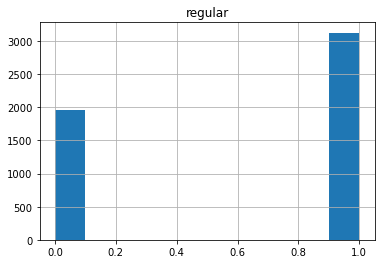

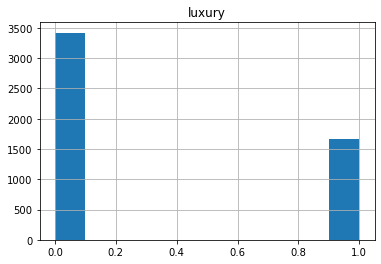

In [20]:
data_set_1.hist(column='regular')
data_set_2.hist(column='luxury')

<BarContainer object of 2 artists>

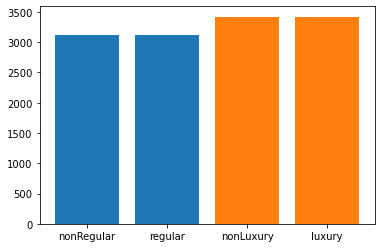

In [21]:
x_balanced1, y_balanced1 = SMOTE().fit_resample(data_set_1.iloc[:,:-1], data_set_1.iloc[:,-1])
x_balanced2, y_balanced2 = SMOTE().fit_resample(data_set_2.iloc[:,:-1], data_set_2.iloc[:,-1])

classes1 = ['nonRegular', 'regular']
plt.bar(classes1, [numpy.sum(y_balanced1 == 1), numpy.sum(y_balanced1 == 0)])
classes2 = ['nonLuxury', 'luxury']
plt.bar(classes2, [numpy.sum(y_balanced2 == 1), numpy.sum(y_balanced2 == 0)])

In [22]:
print("__________________________________________________________________________________________________________________")
print("80% training data, 20% test data")
print("")

x_training1, x_testing1, y_training1, y_testing1 = train_test_split(x_balanced1, y_balanced1, test_size=0.2, random_state=11, shuffle=True)
x_training2, x_testing2, y_training2, y_testing2 = train_test_split(x_balanced2, y_balanced2, test_size=0.2, random_state=11, shuffle=True)

scaler1 = StandardScaler()
x_training1 = scaler1.fit_transform(x_training1)
x_testing1 = scaler1.transform(x_testing1) 

scaler2 = StandardScaler()
x_training2 = scaler2.fit_transform(x_training2)
x_testing2 = scaler2.transform(x_testing2) 

__________________________________________________________________________________________________________________
80% training data, 20% test data



**Implementing and using DIY Logistic Regression**

In [23]:
def sigmoid_function(x): # Lecture 5 slide 9
  return 1 / (1 + numpy.exp(-x))

def diy_lr(x, y, no_of_steps, learning_rate, add_intercept=False):
  
    if add_intercept:
      intercept = numpy.ones((x.shape[0], 1))
      x = numpy.hstack((intercept, x))  #x = features   y = target (Regular / Non regular, luxury / non luxury)
    
    w = numpy.zeros(x.shape[1])         #w = weight
    
    for i in range(0, no_of_steps):
        z = numpy.dot(x, w.T)             #z = scores
        P = sigmoid_function(z)      

        # Update weights with gradient
        error = y - P
        gradient = numpy.dot(x.T, error) 
        w += learning_rate * gradient
        
    return w

def predict_diy_lr(x_data, y_data):
  weights = diy_lr(x_data, y_data, no_of_steps = 300, learning_rate = 5e-5,  add_intercept=True)
  data_with_intercept = numpy.hstack((numpy.ones((x_data.shape[0], 1)), x_data))
  final_scores = numpy.dot(data_with_intercept, weights)
  return numpy.round(sigmoid_function(final_scores))

def print_scores(y_real, y_predicted):
    print('Accuracy score :', accuracy_score(y_real, y_predicted),
          '\nPrecision score :', precision_score(y_real, y_predicted),
          '\nRecall score : ', recall_score(y_real, y_predicted),
          '\nF1-score :', f1_score(y_real, y_predicted))

In [24]:
print('_______________Results with DIY Logistic Regression________________________')
print('_________________________Data set 1 – regular________________________')

y_training1_predicted = predict_diy_lr(x_training1, y_training1)
y_testing1_predicted = predict_diy_lr(x_testing1, y_testing1)
y_training2_predicted = predict_diy_lr(x_training2, y_training2)
y_testing2_predicted = predict_diy_lr(x_testing2, y_testing2)

print('Training set:')
print_scores(y_training1, y_training1_predicted)
print()
print('Test set:')
print_scores(y_testing1, y_testing1_predicted)
print('_________________________Data set 2 – luxury________________________')

print('Training set:')
print_scores(y_training2, y_training2_predicted)
print()
print('Test set:')
print_scores(y_testing2, y_testing2_predicted)

_______________Results with DIY Logistic Regression________________________
_________________________Data set 1 – regular________________________
Training set:
Accuracy score : 0.7295622626424145 
Precision score : 0.7307231322413105 
Recall score :  0.7292663476874003 
F1-score : 0.7299940131710237

Test set:
Accuracy score : 0.7090327737809752 
Precision score : 0.7121464226289518 
Recall score :  0.691437802907916 
F1-score : 0.7016393442622951
_________________________Data set 2 – luxury________________________
Training set:
Accuracy score : 0.8876301845422986 
Precision score : 0.8669453152211772 
Recall score :  0.914401175606172 
F1-score : 0.8900411228321116

Test set:
Accuracy score : 0.8670562454346238 
Precision score : 0.8387942332896461 
Recall score :  0.9155937052932761 
F1-score : 0.8755129958960327


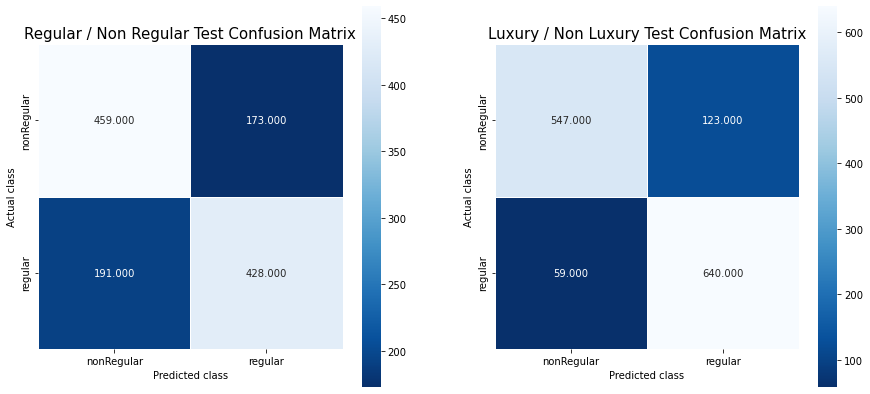

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [25]:
cm1 = metrics.confusion_matrix(y_testing1, y_testing1_predicted)
cm2 = metrics.confusion_matrix(y_testing2, y_testing2_predicted)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

plt.figure(figsize=(7,7))
s = sns.heatmap(cm1, ax = ax1, annot=True, fmt=".3f", xticklabels=classes1, yticklabels=classes1, linewidths=.5, square = True, cmap = 'Blues_r');
ax1.set_ylabel('Actual class');
ax1.set_xlabel('Predicted class');
ax1.set_title('Regular / Non Regular Test Confusion Matrix', size = 15);


plt.figure(figsize=(7,7))
sns.heatmap(cm2, ax = ax2, annot=True, fmt=".3f", xticklabels=classes1, yticklabels=classes1, linewidths=.5, square = True, cmap = 'Blues_r');
ax2.set_ylabel('Actual class');
ax2.set_xlabel('Predicted class');
ax2.set_title('Luxury / Non Luxury Test Confusion Matrix', size = 15);

**Using Sklearn Logistic Regression implementation**

In [50]:
print('______________Results with sklearn Logistic Regression________________________')
print('_________________________Data set 1 – regular________________________')

model_1 = LogisticRegression() # using sklearn logistic regression function
model_1.fit(x_training1, y_training1)

print('Training set:')
print_scores(y_training1, model_1.predict(x_training1))
print()
print('Test set:')
print_scores(y_testing1, model_1.predict(x_testing1))
print('_________________________Data set 2 – luxury________________________')

model_2 = LogisticRegression() # using sklearn logistic regression function
model_2.fit(x_training2, y_training2)

print('Training set:')
print_scores(y_training2, model_2.predict(x_training2))
print()
print('Test set:')
print_scores(y_testing2, model_2.predict(x_testing2))

______________Results with sklearn Logistic Regression________________________
_________________________Data set 1 – regular________________________
Training set:
Accuracy score : 0.7311613032180692 
Precision score : 0.732321214542549 
Recall score :  0.7308612440191388 
F1-score : 0.7315905008980244

Test set:
Accuracy score : 0.7234212629896083 
Precision score : 0.7198067632850241 
Recall score :  0.7221324717285945 
F1-score : 0.7209677419354839
_________________________Data set 2 – luxury________________________
Training set:
Accuracy score : 0.8907363420427553 
Precision score : 0.8752650176678445 
Recall score :  0.9099926524614255 
F1-score : 0.8922910662824207

Test set:
Accuracy score : 0.8736303871439006 
Precision score : 0.8583106267029973 
Recall score :  0.9012875536480687 
F1-score : 0.8792742498255407


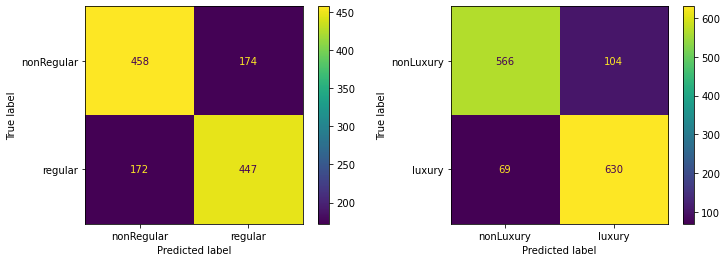

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_estimator(model_1, x_testing1, y_testing1, display_labels=classes1, ax=ax1)
ConfusionMatrixDisplay.from_estimator(model_2, x_testing2, y_testing2, display_labels=classes2, ax=ax2)

**Chosen 2 classification algorithms from scikit-learn: GaussianNB, K Neighbors classifier**

In [28]:
nb1 = GaussianNB()
nb1.fit(x_training1, y_training1)

print('_________________________Data set 1 – regular________________________')

print('Training set:')
print_scores(y_training1, nb1.predict(x_training1))
print()
print('Test set:')
print_scores(y_testing1, nb1.predict(x_testing1))
print('_________________________Data set 2 – luxury________________________')

nb2 = GaussianNB()
nb2.fit(x_training2, y_training2)

print('Training set:')
print_scores(y_training2, nb2.predict(x_training2))
print()
print('Test set:')
print_scores(y_testing2, nb2.predict(x_testing2))

_________________________Data set 1 – regular________________________
Training set:
Accuracy score : 0.7331601039376374 
Precision score : 0.6924844108959632 
Recall score :  0.8413078149920256 
F1-score : 0.7596759675967597

Test set:
Accuracy score : 0.7338129496402878 
Precision score : 0.6866840731070496 
Recall score :  0.8497576736672051 
F1-score : 0.75956678700361
_________________________Data set 2 – luxury________________________
Training set:
Accuracy score : 0.8576649004202448 
Precision score : 0.8513562386980108 
Recall score :  0.8648052902277737 
F1-score : 0.8580280663386186

Test set:
Accuracy score : 0.8480642804967129 
Precision score : 0.8472418670438473 
Recall score :  0.8569384835479256 
F1-score : 0.8520625889046941


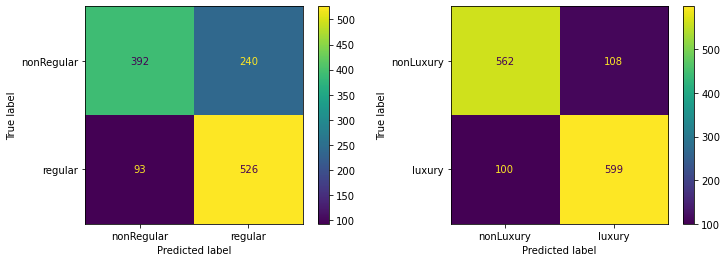

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ConfusionMatrixDisplay.from_estimator(nb1, x_testing1, y_testing1, display_labels=classes1, ax=ax1)
ConfusionMatrixDisplay.from_estimator(nb2, x_testing2, y_testing2, display_labels=classes2, ax=ax2)

In [30]:
knc = KNeighborsClassifier()
knc.fit(x_training1, y_training1)

print('_________________________Data set 1 – regular________________________')

print('Training set:')
print_scores(y_training1, knc.predict(x_training1))
print()
print('Test set:')
print_scores(y_testing1, knc.predict(x_testing1))
print('_________________________Data set 2 – luxury________________________')

knc2 = KNeighborsClassifier()
knc2.fit(x_training2, y_training2)

print('Training set:')
print_scores(y_training2, knc2.predict(x_training2))
print()
print('Test set:')
print_scores(y_testing2, knc2.predict(x_testing2))

_________________________Data set 1 – regular________________________
Training set:
Accuracy score : 0.9070557665400759 
Precision score : 0.9133953864832052 
Recall score :  0.8999202551834131 
F1-score : 0.9066077525607552

Test set:
Accuracy score : 0.8665067945643485 
Precision score : 0.864516129032258 
Recall score :  0.8659127625201939 
F1-score : 0.8652138821630347
_________________________Data set 2 – luxury________________________
Training set:
Accuracy score : 0.935684268225836 
Precision score : 0.9214082503556188 
Recall score :  0.9518736223365173 
F1-score : 0.9363932056378749

Test set:
Accuracy score : 0.9057706355003652 
Precision score : 0.8904109589041096 
Recall score :  0.9298998569384835 
F1-score : 0.9097270818754374


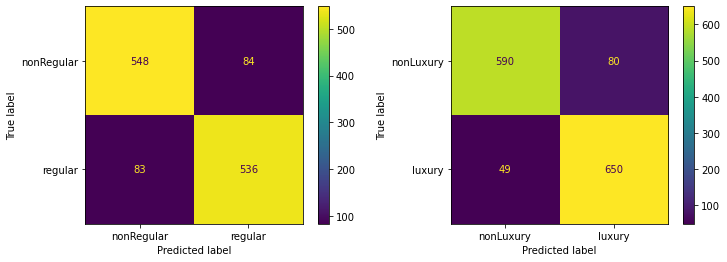

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ConfusionMatrixDisplay.from_estimator(knc, x_testing1, y_testing1, display_labels=classes1, ax=ax1)
ConfusionMatrixDisplay.from_estimator(knc2, x_testing2, y_testing2, display_labels=classes2, ax=ax2)

**Improving KNeighborsClassifier data set 1 model with hyperparameter tuning – using GridSearchCV**

In [32]:
 
parameters = { 'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15, 18],
               'weights' : ['uniform','distance'],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(knc, parameters, cv=10, n_jobs= -1)

grid = grid_search.fit(x_training1, y_training1)
print("Best mean cross-validated score is: ")
grid.best_score_

Best mean cross-validated score is: 


0.8698750499001996

In [33]:
print("Best parameters are: ")
grid.best_params_

Best parameters are: 


{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}

**Testing with best picked parameters**

In [34]:
knc_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], 
                           weights=grid.best_params_['weights'], 
                           algorithm=grid.best_params_['algorithm'])
knc_best.fit(x_training1, y_training1)

print('Training set:')
print_scores(y_training1, knc_best.predict(x_training1))
print()
print('Test set:')
print_scores(y_testing1, knc_best.predict(x_testing1))

Training set:
Accuracy score : 0.9950029982010794 
Precision score : 1.0 
Recall score :  0.9900318979266348 
F1-score : 0.9949909837707874

Test set:
Accuracy score : 0.8721023181454837 
Precision score : 0.8743882544861338 
Recall score :  0.8659127625201939 
F1-score : 0.8701298701298702


**Comparing tuned model (left) and original model (right)**

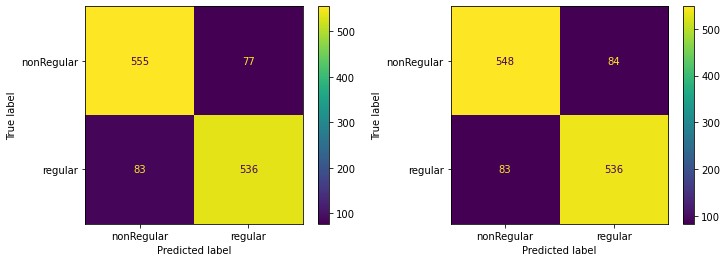

In [35]:
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_estimator(knc_best, x_testing1, y_testing1, display_labels=classes1, ax=ax1)
ConfusionMatrixDisplay.from_estimator(knc, x_testing1, y_testing1, display_labels=classes1, ax=ax2)

**Conclusions so far:**
1. DIY Logistic regression and the one implemented by scikit-learn provide very similar results.
2. One dominating variable "selling_price" can be removed to possibly make the model accuracy more realistic.
3. Class balance should be checked during data preparation, and in this case had to be balanced for both clases.
4. KNeighborsClassifier performed better than other algorithms, GaussianNB performed worse than others.
5. KNeighborsClassifier hyperparameter tuning using GridSearchCV improved results a little.

# **Task 4 – clustering**


In [36]:
data_set = pandas.read_csv("Car details v3.csv", sep = ',')
data_set_cleaned = data_set.dropna() # removing rows with empty values
data_set_cleaned["engine"] = data_set_cleaned["engine"].str.replace(" CC","").astype(int)
data_set_cleaned["mileage"] = data_set_cleaned["mileage"].str.replace(" kmpl","").str.replace(" km/kg","").astype(float)
data_set_cleaned["max_power"] = data_set_cleaned["max_power"].str.replace(" bhp","").astype(float)
data_set_cleaned = data_set_cleaned[data_set_cleaned['year'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['selling_price'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['km_driven'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['mileage'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['engine'] != 0]
data_set_cleaned = data_set_cleaned[data_set_cleaned['max_power'] != 0]

#Getting outliers using Interquartile range (IQR)
                                                  
def outliers(data_set, variables):

    Q1 = data_set[variables].quantile(0.25) #one quarter
    Q3 = data_set[variables].quantile(0.75) #three quarters
    IQR = Q3 - Q1
    return ((data_set[variables] < (Q1 - 1.5 * IQR) ) | (data_set[variables] > (Q3 + 1.5 * IQR))).any(axis=1)

data_outliers = outliers(data_set_cleaned, ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power'])
data_set_cleaned = data_set_cleaned[~data_outliers]

**Implemented DIY clustering algorithm: k-means**

In [37]:
def diy_kmeans(k, X): # Based on lecture 11 slides algorithm
    
    # Initialization – step 1
    
    points, dimensions = X.shape[0], X.shape[1] # Number of points and number of dimensions
    M = numpy.array([]).reshape(dimensions, 0) # Cluster centres
    
    for cluster in range(0, k):
        
        j = int(numpy.rint(numpy.random.uniform(0, points))) # Randomly picking points
        
        M = numpy.c_[ M, X[j]] # Initial cluster center. Translates slice objects to concatenation along the second axis

    cluster_labels = assignment_step(X, M, k, points)
    M_updated = update_step(cluster_labels, k, M)

    # Repeat while there's no change in clusters (stopping criteria). Otherwise, go to step 2.
    
    while numpy.array_equal(M, M_updated) is False: 
        
        M = M_updated
        cluster_labels = assignment_step(X, M, k, points)
        M_updated = update_step(cluster_labels, K, M)

    return cluster_labels
    
    
# Assignment step – assign each point to the nearest centroid. – step 2

def assignment_step(X, M, K, n):
    
    D = numpy.array([]).reshape(n, 0)
    
    for k in range(0, K):
        
        d_temporary = numpy.linalg.norm(X - M[:,k], axis = 1)
        D = numpy.c_[D, d_temporary] # Translates slice objects to concatenation along the second axis
        
    y={}  # Creating empty dictionary for cluster        
    lowest_index = numpy.argmin(D, axis=1) # Cluster index with lowest value from D
    
    for k in range(0, K):
        y[k] = numpy.array([]).reshape(2,0)
    
    for i in range(0, n):
        y[lowest_index[i]] = numpy.c_[y[lowest_index[i]], X[i]] # Assigning points for cluster by the lowest found cluster index

    return y

# Update step – recompute cluster centers by averaging the points belonging to each cluster.

def update_step(y, K, M_to_update):

    for j in range(0, K): # For each cluster
        
        y[j] = y[j].T # Transpose array
        M_to_update[:, j] = numpy.mean(y[j], axis = 0)
        
    return M_to_update

**Using DIY K-means implementation**
**Scatter clusters**

Text(0, 0.5, 'year')

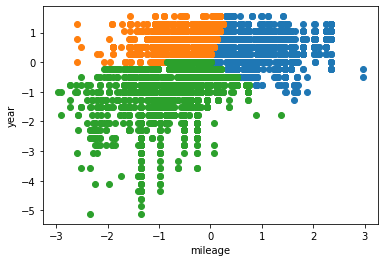

In [53]:
scaler = StandardScaler()
X = data_set_cleaned[['mileage', 'year']].values
X = scaler.fit_transform(X)

number_of_clusters = 3

cluster_labels = diy_kmeans(number_of_clusters, X)

for k in range(0, number_of_clusters):
    plt.scatter(cluster_labels[k][:, 0], cluster_labels[k][:, 1])
    
plt.xlabel('mileage')
plt.ylabel('year')

**Using Sklearn version of k-means**
**Scatter clusters**

Text(0, 0.5, 'year')

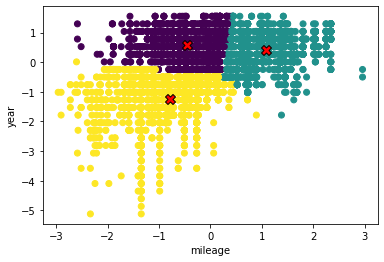

In [39]:
kmeans_sklearn = KMeans(n_clusters=number_of_clusters)
kmeans_sklearn_pred = kmeans_sklearn.fit_predict(X)

centroids = kmeans_sklearn.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c = kmeans_sklearn_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, edgecolor='black')

plt.xlabel('mileage')
plt.ylabel('year')

**As seen from scatter plots – similar results between DIY and scikit clustering implementations.**

**Chosen 2 clustering algorithms from scikit-learn: k-means and DBSCAN**

In [40]:
scaler2 = StandardScaler()

X2 = data_set_cleaned[['selling_price', 'km_driven']].values
X2 = scaler2.fit_transform(X2)

kmeans_scikit = KMeans(n_clusters=number_of_clusters)
dbscan_scikit = DBSCAN(eps=0.2, min_samples=10)

y_kmeans_1 = kmeans_scikit.fit_predict(X)
y_kmeans_2 = kmeans_scikit.fit_predict(X2)
y_dbscan_1 = dbscan_scikit.fit_predict(X)
y_dbscan_2 = dbscan_scikit.fit_predict(X2)

Text(0, 0.5, 'year')

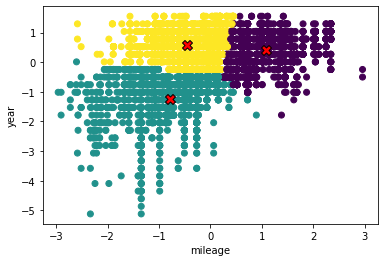

In [41]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans_1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, edgecolor='black')

plt.xlabel('mileage')
plt.ylabel('year')

Text(0, 0.5, 'year')

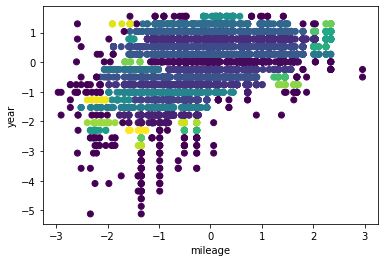

In [42]:
plt.scatter(X[:, 0], X[:, 1], c = y_dbscan_1)
plt.xlabel('mileage')
plt.ylabel('year')

Text(0, 0.5, 'km_driven')

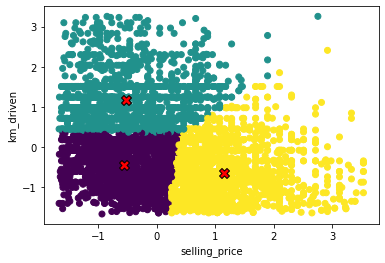

In [43]:
centroids_kmeans_2 = kmeans_scikit.cluster_centers_

plt.scatter(X2[:, 0], X2[:, 1], c = y_kmeans_2)
plt.scatter(centroids_kmeans_2[:, 0], centroids_kmeans_2[:, 1], marker='X', color='red', s=100, edgecolor='black')

plt.xlabel('selling_price')
plt.ylabel('km_driven')

Text(0, 0.5, 'km_driven')

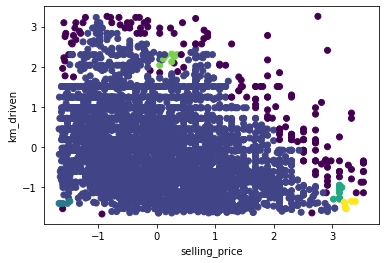

In [44]:
plt.scatter(X2[:, 0], X2[:, 1], c = y_dbscan_2)
plt.xlabel('selling_price')
plt.ylabel('km_driven')

**Adjusting k-means hyperparameters using elbow method**

Text(0, 0.5, 'Inertia')

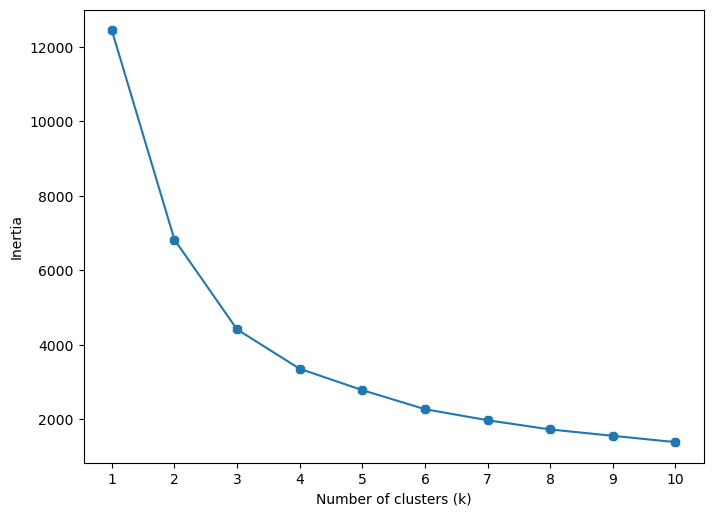

In [45]:
k_values = numpy.ndarray.tolist(numpy.arange(1, 10 + 1))

inertias = []

for k in k_values:
    
    k_means_adjusted = KMeans(n_clusters = k)
    y = k_means_adjusted.fit_predict(X)
    inertias.append(k_means_adjusted.inertia_)
    
plt.figure(figsize=(8, 6), dpi=100)
plt.xticks(k_values)
plt.plot(k_values, inertias, marker = '8')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

**Good choices of k are 2 or 3, where the curve falls more drasticly (elbow)**

**Evaluating clustering quality using different numbers of clusters**

Text(0, 0.5, 'year')

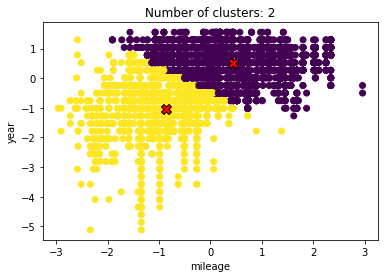

In [46]:
kmeans_sklearn = KMeans(n_clusters=2)
kmeans_sklearn_pred = kmeans_sklearn.fit_predict(X)

centroids = kmeans_sklearn.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c = kmeans_sklearn_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, edgecolor='black')
plt.title('Number of clusters: 2')
plt.xlabel('mileage')
plt.ylabel('year')

Text(0, 0.5, 'year')

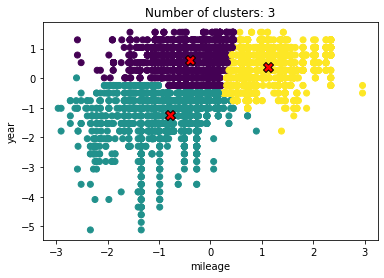

In [47]:
kmeans_sklearn = KMeans(n_clusters=3)
kmeans_sklearn_pred = kmeans_sklearn.fit_predict(X)

centroids = kmeans_sklearn.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c = kmeans_sklearn_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, edgecolor='black')
plt.title('Number of clusters: 3')
plt.xlabel('mileage')
plt.ylabel('year')

**Calculating silhouette scores of different cluster sizes**

Text(0, 0.5, 'Silhouette coefficient')

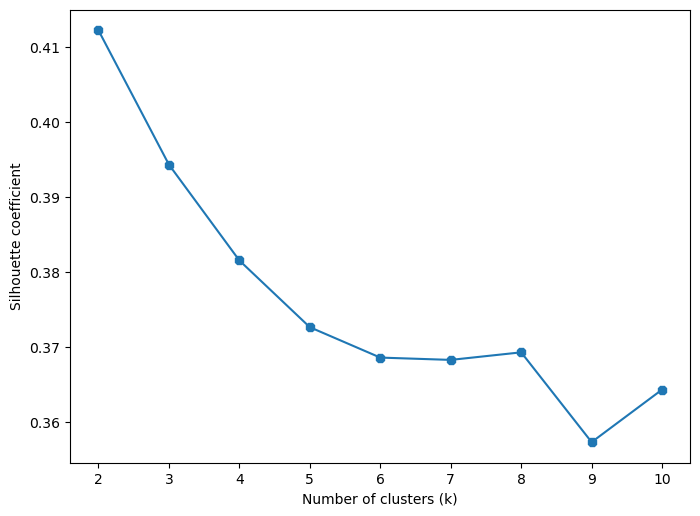

In [48]:
k_values = numpy.ndarray.tolist(numpy.arange(2, 10 + 1))

silhouettes = []

for k in k_values:
    
    k_means_adjusted = KMeans(n_clusters = k)
    y = k_means_adjusted.fit_predict(X)
    silhouettes.append(silhouette_score(X, y))
    
plt.figure(figsize=(8, 6), dpi=100)
plt.xticks(k_values)
plt.plot(k_values, silhouettes, marker = '8')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')

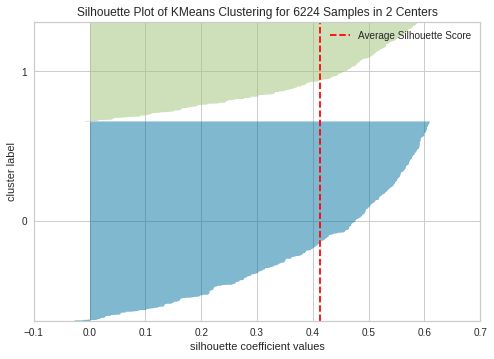

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 6224 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer 

kmeans_sklearn = KMeans(n_clusters=2)

k_means_silhouette_visualisation = SilhouetteVisualizer(kmeans_sklearn, colors='yellowbrick')
k_means_silhouette_visualisation.fit(X)
k_means_silhouette_visualisation.show()

# **Conclusions:**
1. DIY clustering and sci-kit implemented clustering algorithms show similar results.
2. For selected feature set and data, k = 2 provided highest silhouette coefficient and more drastic inertia curve change.
3. DBSCAN provided a clear visible result for only the second feature set (selling price and km_driven).
4. K-means in this case provided a better visual result for clearly visible clusters.
5. Based on silhouette scores, we can say that clusters are not well apart from each other, and there may be ambiguity. Average score is around 0.4.